In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Годинник**

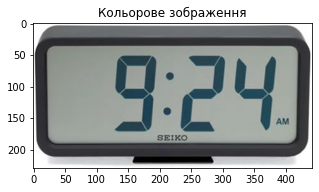

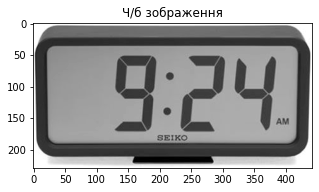

In [ ]:
img_digit = cv2.imread("/content/digit.jpg")
img_digit_gray = cv2.cvtColor(img_digit, cv2.COLOR_BGR2GRAY)
img_digit_rgb = cv2.cvtColor(img_digit, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title("Кольорове зображення")
plt.imshow(img_digit_rgb)
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Ч/б зображення")
plt.imshow(img_digit_gray, cmap="gray")
plt.show()

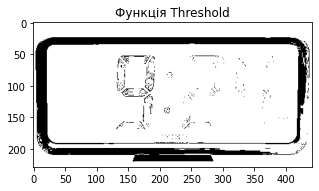

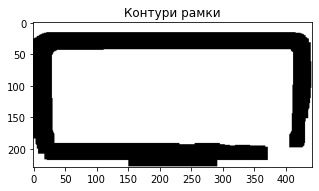

In [ ]:
kernel = np.ones((5, 5),"uint8")

_,thr_func = cv2.threshold(img_digit_gray,53,255,cv2.THRESH_BINARY)

border_cont = cv2.morphologyEx(thr_func, cv2.MORPH_CLOSE, kernel)
border_cont = cv2.erode(border_cont,kernel,iterations = 4)

plt.figure(figsize=(5, 5))
plt.title("Функція Threshold")
plt.imshow(thr_func, cmap="gray")
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Контури рамки")
plt.imshow(border_cont, cmap="gray")
plt.show()

**Баскетбольне поле**

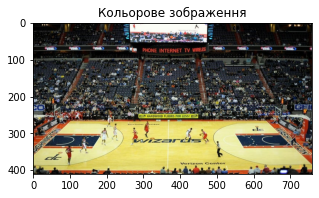

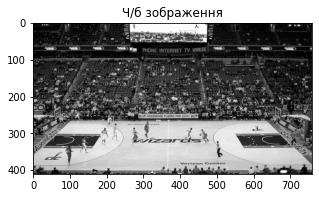

In [ ]:
img_bb = cv2.imread("/content/basketball.jpg")
img_bb_gray = cv2.cvtColor(img_bb, cv2.COLOR_BGR2GRAY)
img_bb_rgb = cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title("Кольорове зображення")
plt.imshow(img_bb_rgb)
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Ч/б зображення")
plt.imshow(img_bb_gray, cmap="gray")
plt.show()

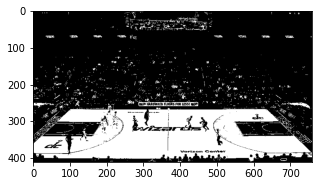

In [ ]:
_,thresh_up = cv2.threshold(img_bb_gray,240,255,cv2.THRESH_BINARY)
_,thresh_down = cv2.threshold(img_bb_gray,170,255,cv2.THRESH_BINARY)

mask = thresh_down-thresh_up

plt.figure(figsize=(5,5))
plt.imshow(mask, cmap="gray")
plt.show()

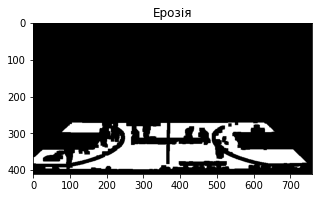

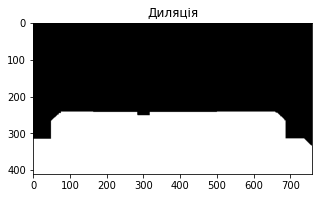

In [ ]:
erode = cv2.erode(mask,kernel,iterations=2)
dilate = cv2.dilate(erode,kernel,iterations=15)

plt.figure(figsize=(5,5))
plt.title("Ерозія")
plt.imshow(erode, cmap="gray")
plt.show()

plt.figure(figsize=(5,5))
plt.title("Диляція")
plt.imshow(dilate, cmap="gray")
plt.show()

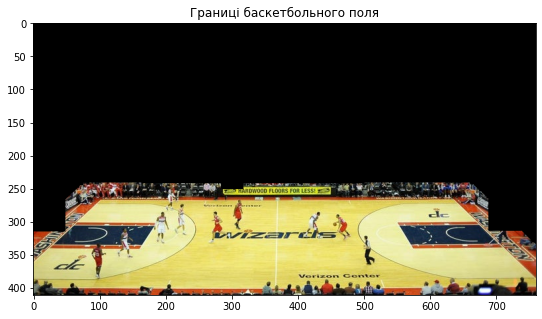

In [ ]:
court = cv2.bitwise_and(img_bb_rgb, img_bb_rgb, mask = dilate)

plt.figure(figsize=(10,5))
plt.title("Границі баскетбольного поля")
plt.imshow(court)

# **Додаткове завдання**
1. На основі лабораторної работи Draw_OpenCV обвести контури знайдених об'єктів
2. Визначити область зображення на якій зображений QR-код - x, y, ширина, висота. Відобразити баундинг бокс.
3. Виконати декодування QR коду. Вивести код над баундінг боксом (як показано в прикладі вище)

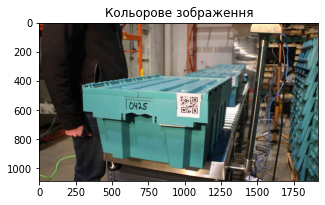

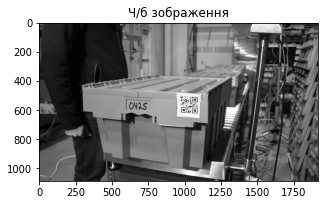

In [ ]:
img_qr = cv2.imread("/content/frame1.jpg")
img_qr_gray = cv2.cvtColor(img_qr, cv2.COLOR_BGR2GRAY)
img_qr_rgb = cv2.cvtColor(img_qr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.title("Кольорове зображення")
plt.imshow(img_qr_rgb)
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Ч/б зображення")
plt.imshow(img_qr_gray, cmap="gray")
plt.show()

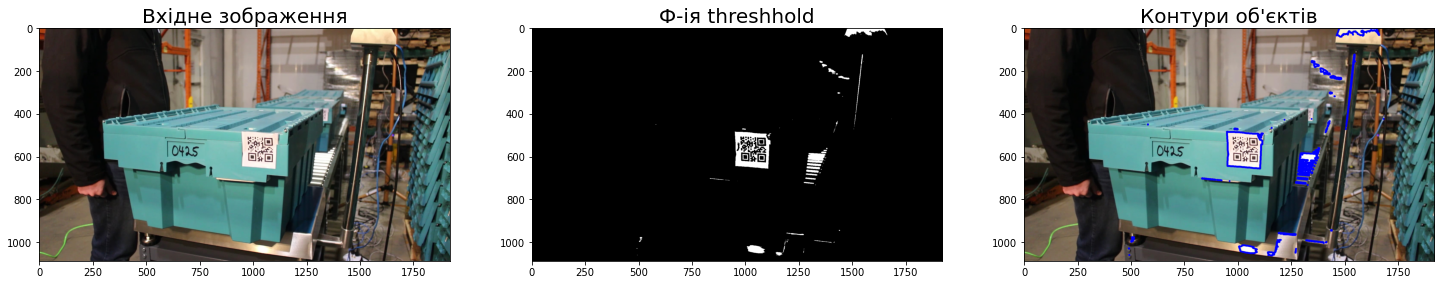

In [ ]:
_,thr_func = cv2.threshold(img_qr_gray,235,255,cv2.THRESH_BINARY)

conts,_ = cv2.findContours(thr_func, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_out = cv2.drawContours(img_qr_rgb.copy(), cntrs, -1, (0,0,255), 8)


plt.figure(figsize=(25,10))

plt.subplot(131)
plt.title("Вхідне зображення", fontsize=20)
plt.imshow(img_qr_rgb)

plt.subplot(132)
plt.title("Ф-ія threshhold", fontsize=20)
plt.imshow(thr_func, cmap="gray")

plt.subplot(133)
plt.title("Контури об'єктів", fontsize=20)
plt.imshow(img_out)

**Декодування QR коду**

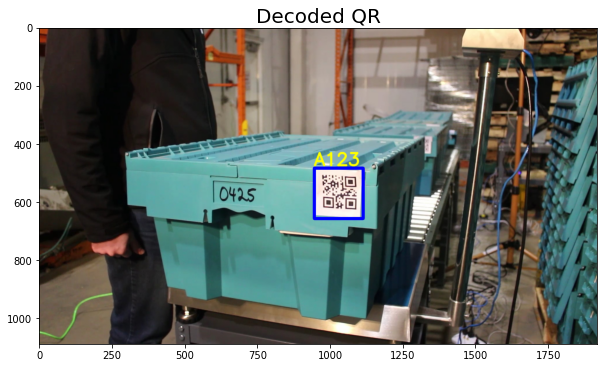

In [ ]:
def decode_qr(ROI):
  qrDecoder = cv2.QRCodeDetector()
  return qrDecoder.detectAndDecode(ROI)


result_qr = img_qr_rgb.copy()

for c in conts:
  area = cv2.contourArea(c)

  if area > 5000:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(result_qr,(x,y), (x + w, y + h),(0,0,255),10)

    ROI = img[y:y+h, x:x+w]
    
    data = decode_qr(ROI)

    cv2.putText(result_qr,data[0],(x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 2,(255,255,0),6,cv2.LINE_AA)

    
plt.figure(figsize=(10,10))
plt.title("Decoded QR", fontsize=20)
plt.imshow(result_qr)